## Welcome to Week 0!

Live sessions during this course will be oriented primarily around:

1.   Lecture
2.   Programming in [Jupyter notebooks](https://jupyter.org/) like the one you're in now.

We will release notebooks on Mondays. Before lecture, you should download the .ipynb file, and open it either locally on your own machine or in Google Colab. It's a good idea to skim the notebook to get a sense for what it covers, but **don't start working on it before lecture**--the idea is for you to starting working on these **in class** (with the instructors and, more importantly, with your classmates).

---

This week we have some warm-up excercises to go through so that we can all practice using notebooks and some other tools that will be used throughout the course.

*   Google Colab is a tool for editing and running Jupyter notebooks using Google's infrastructure. For most of you, using Colab to edit and run notebooks will make your life easier, especially after week 5 of the course.
*   We're asking you to do Week 0's assignment (this one) in Colab, but after today you **aren't required to use it**.


### Task 1 -- Open File in Google Colab

1. Download the .ipynb file released in Canvas.
2. Make a folder in Google Drive where you can put content for the course and upload the .ipynb file to your Google Drive folder
3. Install Google Colaboratory:
    * Right click on the .ipynb file and go to "Connect more apps" (you can skip this if you already see "Google Colaboratory"
    * Search for "Colaboratory" and click Install.
4. Now if you click on the file it should open in Google colab.

### Task 2 -- Open csv File in Google Colab

There are [several ways to do this](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=c2W5A2px3doP), but just follow along below.

> *Note: If you run this file locally rather than in Google Colab, you can just load in the data as follows:*
> 
> ```
> import pandas as pd
> data = pd.read_csv('time_series_covid_19_confirmed.csv')
> ```

1. Download the data file from Canvas (this week the data is `time_series_covid_19_confirmed.csv`).

2. Import pandas, which we'll be using to wrangle .csv files.

In [3]:
import pandas as pd

3. Upload the time_series_covid_19_confirmed.csv file to Google drive.

4. We will be using the google colab package for managing the drive. Run the following line and grant the permissions requested.

In [4]:
#from google.colab import drive

5. Run the following code to mount your Google Drive at the location */content/drive* on the virtual machine running this notebook. You will have access to all the files in your Google Drive.

In [5]:
#drive.mount('/content/drive')

6. Edit filepath to be the path to the csv file. In my case, it's located in Google Drive in a folder called fourthbrain.
7. Run the following line to load the data into a Pandas DataFrame.

In [6]:
#filepath = '/content/drive/MyDrive/Colab Notebooks/Week0/time_series_covid_19_confirmed.csv'
data = pd.read_csv('time_series_covid_19_confirmed.csv')

8. Verify that the data is loaded in correctly by running data.head() to see the first few rows of the DataFrame.

In [7]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


In [8]:
data.shape

(266, 225)

### Task 3 -- Get familiar with the data

1. We will be using matplotlib, so start by importing it.

In [9]:
from matplotlib import pyplot as plt

2. Look at the first 5 rows of the DataFrame with `data.head()`

In [10]:
data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


3. Look at the data to get an idea of what it is and then write a few sentences describing what you notice about the data.

***Answer***

1. Most of the data in the province/State column is empty or with NaN values.
2. The file has number of covid cases between january and august 2020
3. We can transform the data grouping the information by date and counting by number of cases 

4. Notice that the data includes country level data as well as province/state level data. Let's only include rows that don't have provinces or states. Use the `.isna()` method on the `Province/State` column to determine these rows and subset to only include the rows without a Province/State.

  Verify that the result of the `head()` method is what's expected.

In [11]:
data_countries = data[data['Province/State'].isna()]
data_countries.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


In [12]:
data_countries.shape

(185, 225)

5. Use the `.set_index()` method to set the index to be the `Country/Region` column. This will make acccessing the data by country easier. Use the `inplace=True` attribute to modify the existing DataFrame rather than creating a new one.

  Verify that the result of the `head()` method is what's expected.

In [13]:
data_countries.set_index('Country/Region', inplace=True)
data_countries.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


6. Subsample the data so that it only includes the first 100 days. Hint: Use `iloc`

  Verify that the result of the `head()` method is what's expected.

In [14]:
data_subsampled = data_countries.iloc[:, 0:103]
data_subsampled.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [15]:
data.shape

(266, 225)

7. We can drop the `Province/State` column since we are no longer using it.

  Here, `axis=1` is referring to dropping a column rather than dropping a row.
  
  Look at the result of the `head()` method to verify that it's what's expected.

In [16]:
data_subsampled.drop(["Province/State"], axis=1, inplace=True)
data_subsampled.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


8. What is the size of your subsampled dataset? (Use `shape`)

In [17]:
data_subsampled.shape

(185, 102)

9. Choose 5 countries and plot infections vs the number of days after January 22, 2020.

  To get the row of a country by name, do `data_subsampled.loc['Angola']`.

<AxesSubplot:>

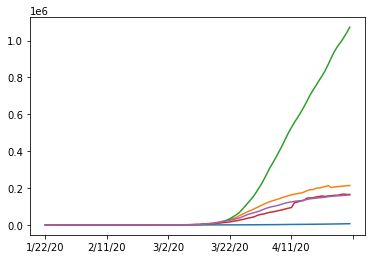

In [18]:
data_subsampled.loc['Colombia'][2:].plot()
data_subsampled.loc['Spain'][2:].plot()
data_subsampled.loc['US'][2:].plot()
data_subsampled.loc['France'][2:].plot()
data_subsampled.loc['Germany'][2:].plot()

### Task 4 -- Set up a regression problem based on latitude, longitude, and date

Now we're going to see if the combination of latitude, longitude, and date can be used to accurately predict the number of infections in this dataset.

1. We will be creating two matrices $\mathbf{X}$ and $\mathbf{Y}$, where $\mathbf{X}$ holds the `[lat, long, date]` data and $\mathbf{Y}$ holds the `infection` data. $\mathbf{X}$ will have shape $k \times 3$ and $\mathbf{Y}$ should have shape $k \times 1$. What is the value $k$, based on the size of the subsample from the full dataset that we've taken?


*k = 185*

2. It will be easier to work with the data if we do a transformation using the `.melt()` method.

In [19]:
data_transformed = data_subsampled.melt(id_vars=["Lat", "Long"], var_name='Date', value_name="Covid Cases")
data_transformed.head()


,Lat,Long,Date,Covid Cases
0,33.93911,67.709953,1/22/20,0
1,41.15330,20.168300,1/22/20,0
2,28.03390,1.659600,1/22/20,0
3,42.50630,1.521800,1/22/20,0
4,-11.20270,17.873900,1/22/20,0


3. Looking at the result of `data_transformed.head()`, what did the `.melt()` transformation do?

***Answer***

This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.

In this case,  this method is transposing the dataframe, where Lat and Lon are the identifier columns. The function is counting the number of cases where the Lat and lon is the same for a specific date. 

4. Instead of the data, we will want to work with `Days since January 22, 2020`, so let's add that column. Pandas has some slick ways of working dates, so we're taking advantage of that to get what we want.

In [20]:
from datetime import datetime
date_series = pd.to_datetime(data_transformed['Date'])
data_transformed['Num Days'] = (date_series - date_series[0]).dt.days
data_transformed.head()

,Lat,Long,Date,Covid Cases,Num Days
0,33.93911,67.709953,1/22/20,0,0
1,41.15330,20.168300,1/22/20,0,0
2,28.03390,1.659600,1/22/20,0,0
3,42.50630,1.521800,1/22/20,0,0
4,-11.20270,17.873900,1/22/20,0,0


In [21]:
data_transformed.shape

(18500, 5)

5. Now we're ready to create the matrices $\mathbf{X}$ and $\mathbf{Y}$ below by selecting the appropriate data from the `data_transformed` DataFrame.

  Make sure to do `.values` to convert the data to numpy arrays rather than Pandas objects.

In [22]:
X = data_transformed[['Lat','Long','Num Days']]
X = X.values
print(X)

Y = data_transformed[['Covid Cases']]
Y = Y.values
print(Y)

[[ 33.93911   67.709953   0.      ]
 [ 41.1533    20.1683     0.      ]
 [ 28.0339     1.6596     0.      ]
 ...
 [ 15.552727  48.516388  99.      ]
 [-13.133897  27.849332  99.      ]
 [-19.015438  29.154857  99.      ]]
[[  0]
 [  0]
 [  0]
 ...
 [  6]
 [106]
 [ 40]]


6. The following code will make a plot for each of the 3 independent variables (latitude, longitude, and date). Each plot shoes the variable on the x axis and the number of infections on the y axis.

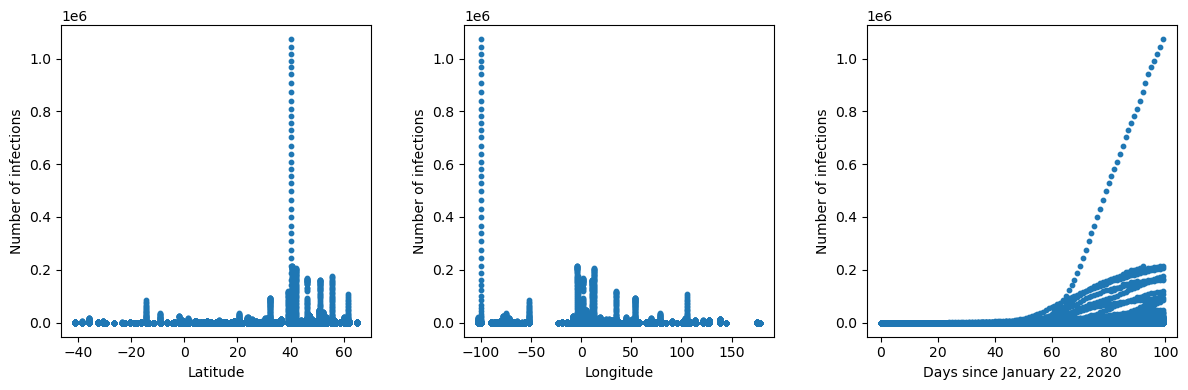

In [23]:
plt.figure(figsize=(12, 4), dpi=100)
for i, variable in enumerate(['Latitude', 'Longitude', 'Days since January 22, 2020']):
  ax = plt.subplot(1, 3, i + 1)
  ax.scatter(X[:, i], Y, s=10)
  ax.set_xlabel(variable)
  ax.set_ylabel('Number of infections')
plt.tight_layout(w_pad=3)

7. Discuss with your classmates in your breakout room what you notice about this data. Are there other ways you might try to visualize it to uncover some structure? Does this data look like a good candidate for fitting a linear model?

***Answer***

1. Create a graph by latitude and longitude makes no sense or it's not providing any valuable data, since latitude and longitue should be used together (lat and lon is a geographic representation).

2. In the third graph, it looks like we have a lot of dependency between variables. It is possible that we can have a negative intercept in this regression or a negative correlation between variables

8. Now split the data randomly into training and test sets. Make the training set 70% of the data and the test set the remaining 30%. You could do this manually, but we'll use the `train_test_split` function from the machine learning library [scikit-learn](https://scikit-learn.org/stable/). We use a random state so that every time you run the code you'll get the same result which makes it easier to test our code.

    The line should look like:
    ```
    X_train, X_test, Y_train, Y_test = train_test_split(<FILL IN HERE>, random_state=10)
    ```
    
    Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to determine what parameters to pass `train_test_split`.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(12950, 3)
(5550, 3)
(12950, 1)
(5550, 1)


### Task 5 -- Apply a linear regression model to the data

We'll be using scikit-learn's `LinearRegression` module. In the week's material, you'll learn how to do a linear regression manually, but for now let's use scikit-learn's implementation.

1. Import the `LinearRegression` module.

In [26]:
from sklearn.linear_model import LinearRegression

2. Build a `LinearRegression` model for our data. You will need run the `lin_regression.fit()` method passing it the training set (`X_train` and `Y_train`). Take a look at the scikit-learn documentation for [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for more details.

In [27]:
lin_regression = LinearRegression()
lin_regression.fit(X_train, Y_train)
print("The regression coefficients are: ", lin_regression.coef_)
print("The intercept is", lin_regression.intercept_)

The regression coefficients are:  [[146.88808287 -52.03302752 161.1905594 ]]
The intercept is [-6271.35334669]


3. Use the `.predict()` method of the `lin_regression` object to generate predictions of the test data.

In [28]:
Y_pred = lin_regression.predict(X_test)

4. What is the MSE? Use scikit-learn's `mean_squared_error` function to find out. You'll need to compare the `Y_pred` with `Y_test`.

In [29]:
from sklearn.metrics import mean_squared_error as mse
print(mse(Y_test, Y_pred))

659627623.0450557


5. You can also calculate the R^2 value by using the `score()` method of `lin_regression`. Make sure to pass it the test arrays (and not the train ones!)

In [30]:
print(lin_regression.score(X_test,Y_test))

0.03260569121454682


### Task 6 -- Apply a polynomial regression of degree 2 to this data

To see if we can improve on the accuracy, we're going to try adding polynomial features. We can do this with the `PolynomialFeatures` module.

1. Import the module we'll be using.

In [31]:
from sklearn.preprocessing import PolynomialFeatures

2. We'll use `degree=2` which means we'll include new features that are our old features squared as well as the combinations of the features (e.g. $ab$). How many new features will this add?

  Note: it will also include an additional constant feature.

***Answer*** 

It will add ***five*** addtional features.

3. We use the `PolynomialFeatures` module to add the new features. See the result of the shape of the new test set. Is it what you expected? If not, go back and see which features you missed.

In [32]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
print("New shape of test data=", X_test_poly.shape)

New shape of test data= (5550, 10)


4. Use the new `X_train_poly` and `Y_train_poly` build a linear regression model and get the MSE and R^2 values like you did above.

In [33]:
linear_regression = LinearRegression()
# Fit the model on train data only
linear_regression.fit(X_train_poly, Y_train)
print("Linear Regression Coefficients are=",linear_regression.coef_)
print("constant coefficient=",linear_regression.intercept_)

Y_pred_poly = linear_regression.predict(X_test_poly)
print(mse(Y_test, Y_pred_poly))
print(linear_regression.score(X_test_poly,Y_test))

Linear Regression Coefficients are= [[   0.         -141.36920917   68.37680467 -309.92220693    2.38314455
    -2.96247011    6.27915679    0.60289186   -2.35856042    3.88998221]]
constant coefficient= [674.46789337]
634880065.2295289
0.06889987561598498


5. How does the score of this model that uses polynomial features compare to the linear model above?

***Answer***

1. This polynomial features with degree 2 perform similar to the linear model. The score for the linear model is 3% and for this polynomial model is 6%


### Task 7 -- Run an experiment identifying the degree of the best-fitting polynomial regression

1. Your job is now to repeat the fitting and prediction steps above, but for polyomials of all orders from 1 to 20. For each fit, compute and save the mean squared error of the predictions.

In [34]:
import numpy as np

mses = []
degrees = np.arange(1, 21)
minimum_mse, minimum_degree = 1e10, 0

for degree in degrees:
  poly_features = PolynomialFeatures(degree=degree)
  X_train_poly = poly_features.fit_transform(X_train)
  X_test_poly = poly_features.transform(X_test)
  
  linear_regression = LinearRegression()
  # Fit the model on train data only
  linear_regression.fit(X_train_poly, Y_train)
  Y_pred_poly = linear_regression.predict(X_test_poly)
  mse_poly = mse(Y_test, Y_pred_poly)
  score_poly = linear_regression.score(X_test_poly,Y_test)
  mses.append(mse_poly) 

  print("Degree:" + str(degree))
  print("MSE: " + str(mse_poly))
  print("Score: " + str(score_poly))
  # Validation of degrees 
  if minimum_mse > mse_poly:
    minimum_mse = mse_poly
    minimum_deg = degree 

Degree:1
MSE: 659627623.045056
Score: 0.032605691214546484
Degree:2
MSE: 634880065.2295289
Score: 0.06889987561598498
Degree:3
MSE: 596934127.3093456
Score: 0.12455049287796716
Degree:4
MSE: 510824595.59969544
Score: 0.25083670042571593
Degree:5
MSE: 367979914.13022584
Score: 0.4603293400091206
Degree:6
MSE: 244763488.97137013
Score: 0.6410356419940269
Degree:7
MSE: 180552148.02511016
Score: 0.7352064796313877
Degree:8
MSE: 155155985.2423928
Score: 0.7724518927746022
Degree:9
MSE: 144892949.20587918
Score: 0.7875034192809522
Degree:10
MSE: 137400318.1451361
Score: 0.798491935214429
Degree:11
MSE: 131276966.25898145
Score: 0.8074722986170575
Degree:12
MSE: 134088075.79897764
Score: 0.8033495916906694
Degree:13
MSE: 119792827.28628375
Score: 0.8243146658790637
Degree:14
MSE: 118221967.09845446
Score: 0.8266184523678535
Degree:15
MSE: 116181688.28088665
Score: 0.8296106771436127
Degree:16
MSE: 114358899.66304177
Score: 0.8322839359238952
Degree:17
MSE: 130673406.23481587
Score: 0.80835746

2. Report the polynomial order that resulted in the best fit. Does this number make sense? Do you think the regression has produced a good model for the data? Discuss with your classmates.

The degree 20 with MSE 114092769.79923578 is the best


Text(0, 0.5, 'MSE')

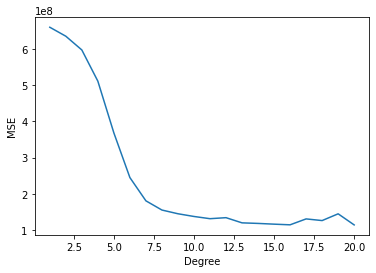

In [35]:
# Plot results
print('The degree {} with MSE {} is the best'.format(minimum_deg, minimum_mse))
        
figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(degrees, mses)
ax.set_xlabel('Degree')
ax.set_ylabel('MSE')